In [46]:
from sklearn.neural_network import MLPClassifier  
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [3]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
train


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


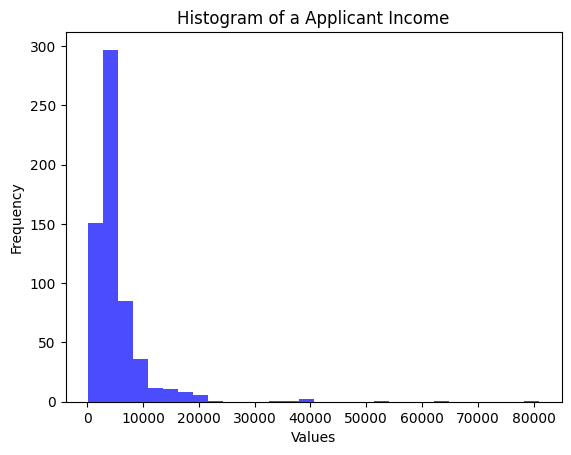

In [5]:
train_ApplicantIncome = train['ApplicantIncome']

# Create a histogram
plt.hist(train_ApplicantIncome, bins=30, color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of a Applicant Income')

# Show the plot
plt.show()

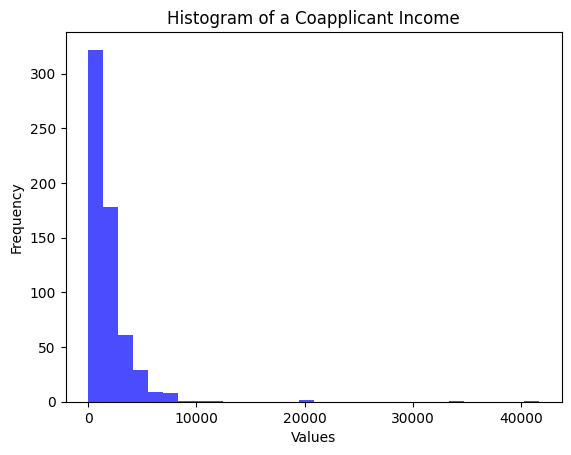

In [6]:
train_CoapplicantIncome = train['CoapplicantIncome']

# Create a histogram
plt.hist(train_CoapplicantIncome, bins=30, color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of a Coapplicant Income')

# Show the plot
plt.show()

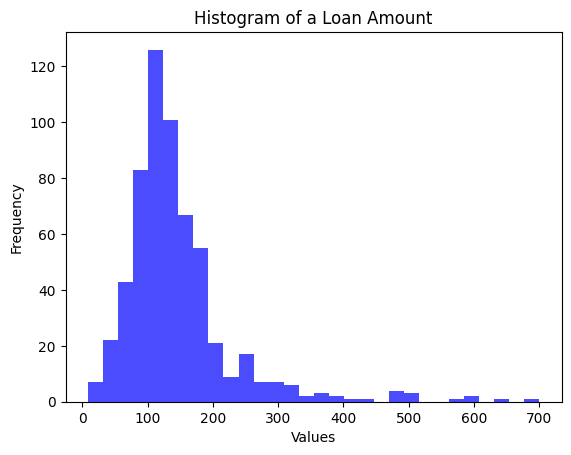

In [7]:
train_LoanAmount = train['LoanAmount']

# Create a histogram
plt.hist(train_LoanAmount, bins=30, color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of a Loan Amount')

# Show the plot
plt.show()

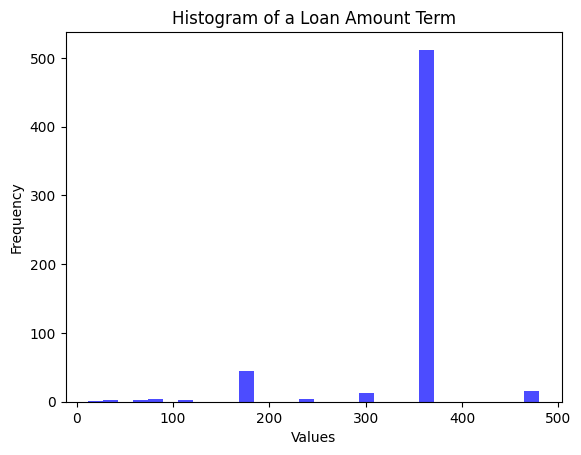

In [8]:
train_Loan_Amount_Term = train['Loan_Amount_Term']

# Create a histogram
plt.hist(train_Loan_Amount_Term, bins=30, color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of a Loan Amount Term')

# Show the plot
plt.show()

<Axes: xlabel='Gender'>

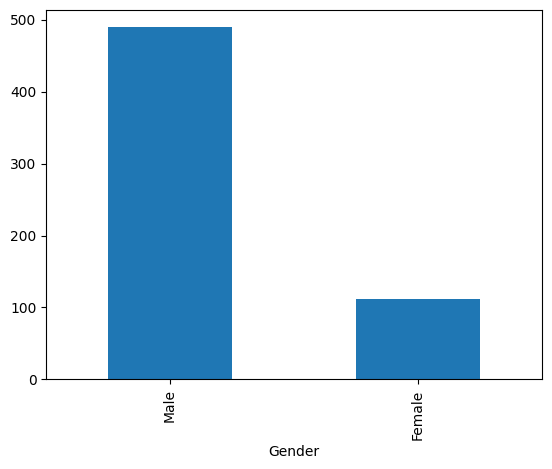

In [9]:
train['Gender'].value_counts().plot(kind='bar')

<Axes: xlabel='Married'>

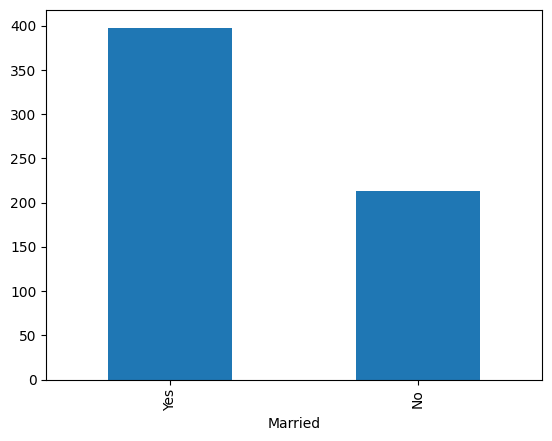

In [10]:
train['Married'].value_counts().plot(kind='bar')

<Axes: xlabel='Dependents'>

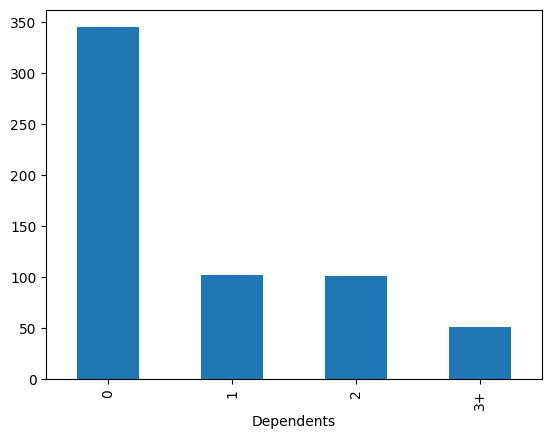

In [11]:
train['Dependents'].value_counts().plot(kind='bar')

<Axes: xlabel='Education'>

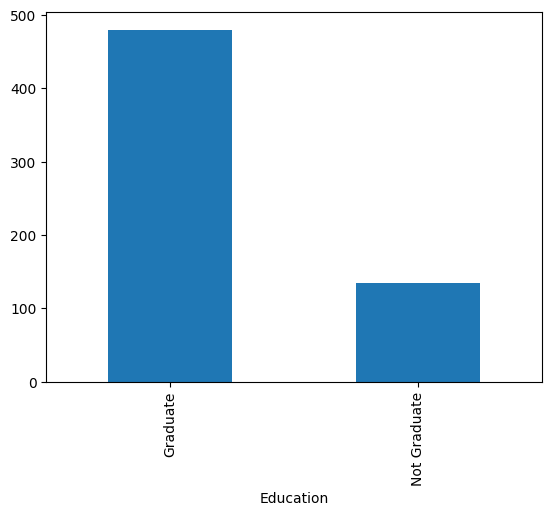

In [12]:
train['Education'].value_counts().plot(kind='bar')

<Axes: xlabel='Self_Employed'>

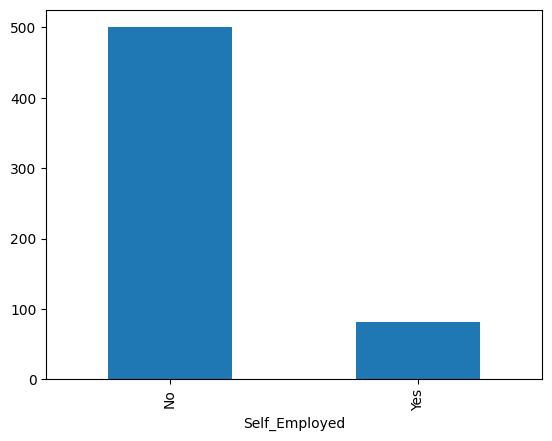

In [13]:
train['Self_Employed'].value_counts().plot(kind='bar')

<Axes: xlabel='Credit_History'>

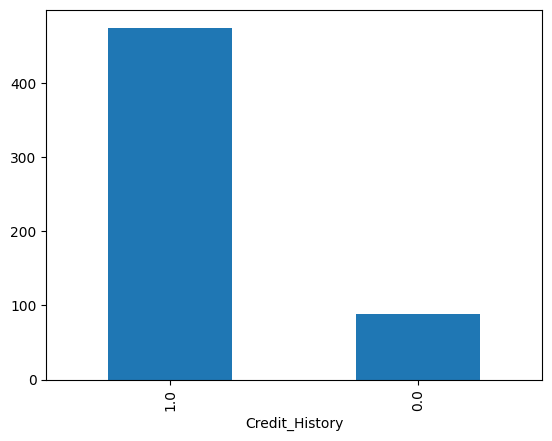

In [14]:
train['Credit_History'].value_counts().plot(kind='bar')

<Axes: xlabel='Property_Area'>

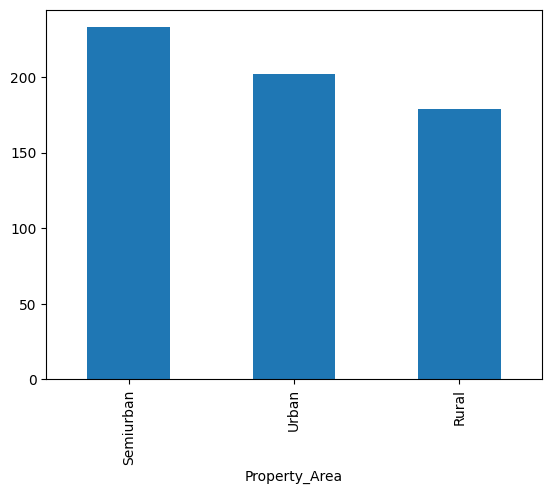

In [15]:
train['Property_Area'].value_counts().plot(kind='bar')

In [17]:
test['Gender'].fillna('Male', inplace=True) #We noticed that males were more common so we decide input with mode
test['Gender'] = test['Gender'].map({'Male': 0, 'Female': 1})


In [18]:
train['Gender'].fillna('Male', inplace=True)
train['Gender'] = train['Gender'].map({'Male': 0, 'Female': 1})

In [19]:
test['is_Urban'] = test['Property_Area'].map({'Urban': 1, 'Rural': 0, 'Semiurban':0})
test['is_Rural'] = test['Property_Area'].map({'Urban': 0, 'Rural': 1, 'Semiurban':0})
test['is_Semiurban'] = test['Property_Area'].map({'Urban': 0, 'Rural': 0, 'Semiurban':1})
test.drop(['Property_Area'], axis = 1 )

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,is_Urban,is_Rural,is_Semiurban
0,LP001015,0,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,1,0,0
1,LP001022,0,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,1,0,0
2,LP001031,0,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,1,0,0
3,LP001035,0,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,1,0,0
4,LP001051,0,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,0,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,1,0,0
363,LP002975,0,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,1,0,0
364,LP002980,0,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,0,0,1
365,LP002986,0,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,0,1,0


In [20]:
train['is_Urban'] = train['Property_Area'].map({'Urban': 1, 'Rural': 0, 'Semiurban':0})
train['is_Rural'] = train['Property_Area'].map({'Urban': 0, 'Rural': 1, 'Semiurban':0})
train['is_Semiurban'] = train['Property_Area'].map({'Urban': 0, 'Rural': 0, 'Semiurban':1})
train.drop(['Property_Area'], axis = 1 )


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,is_Urban,is_Rural,is_Semiurban
0,LP001002,0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Y,1,0,0
1,LP001003,0,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N,0,1,0
2,LP001005,0,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y,1,0,0
3,LP001006,0,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y,1,0,0
4,LP001008,0,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Y,0,1,0
610,LP002979,0,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Y,0,1,0
611,LP002983,0,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Y,1,0,0
612,LP002984,0,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Y,1,0,0


In [21]:
mode_Married = train['Married'].mode()[0]
train['Married'].fillna(mode_Married, inplace=True)
train['Married'] = train['Married'].map({'No': 0, 'Yes': 1})

In [22]:
test['Married'] = test['Married'].map({'No': 0, 'Yes': 1})

In [23]:
train['Dependents'].fillna(0, inplace=True)
train['Dependents'] = train['Dependents'].replace('3+', '3')
train['Dependents'] = pd.to_numeric(train['Dependents'], errors='coerce')

In [24]:
test['Dependents'].fillna(0, inplace=True)
test['Dependents'] = test['Dependents'].replace('3+', '3')
test['Dependents'] = pd.to_numeric(test['Dependents'], errors='coerce')

In [25]:
train['Education'] = train['Education'].map({'Not Graduate': 0, 'Graduate': 1})

In [26]:
test['Education'] = test['Education'].map({'Not Graduate': 0, 'Graduate': 1})

In [27]:
mode_SE = test['Self_Employed'].mode()[0]
test['Self_Employed'].fillna(mode_SE, inplace=True)

In [28]:
test['Self_Employed'] = test['Self_Employed'].map({'No': 0, 'Yes': 1})

In [29]:
mode_SE = train['Self_Employed'].mode()[0]
train['Self_Employed'].fillna(mode_SE, inplace=True)

In [30]:
train['Self_Employed'] = train['Self_Employed'].map({'No': 0, 'Yes': 1})

In [31]:
mean_LoanAmount = test['LoanAmount'].mean()
test['LoanAmount'].fillna(round(mean_LoanAmount,1), inplace=True)

In [32]:
mean_LoanAmount = train['LoanAmount'].mean()
train['LoanAmount'].fillna(round(mean_LoanAmount,1), inplace=True)


In [33]:
mode_Term = test['Loan_Amount_Term'].mode()[0]
test['Loan_Amount_Term'].fillna(mode_Term, inplace=True)

In [34]:
mode_Term = train['Loan_Amount_Term'].mode()[0]
train['Loan_Amount_Term'].fillna(mode_Term, inplace=True)

In [35]:
mode_Credit = train['Credit_History'].mode()[0]
train['Credit_History'].fillna(mode_Credit, inplace=True)

In [36]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,is_Urban,is_Rural,is_Semiurban
0,LP001002,0,0,0,1,0,5849,0.0,146.4,360.0,1.0,Urban,Y,1,0,0
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,N,0,1,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,Y,1,0,0
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,0,0
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,Rural,Y,0,1,0
610,LP002979,0,1,3,1,0,4106,0.0,40.0,180.0,1.0,Rural,Y,0,1,0
611,LP002983,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,Urban,Y,1,0,0
612,LP002984,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,Urban,Y,1,0,0


In [37]:
train.drop(['Property_Area'], axis =1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,is_Urban,is_Rural,is_Semiurban
0,LP001002,0,0,0,1,0,5849,0.0,146.4,360.0,1.0,Y,1,0,0
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,N,0,1,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,Y,1,0,0
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Y,1,0,0
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,Y,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,Y,0,1,0
610,LP002979,0,1,3,1,0,4106,0.0,40.0,180.0,1.0,Y,0,1,0
611,LP002983,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,Y,1,0,0
612,LP002984,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,Y,1,0,0


In [38]:
train['Loan_Status'] = train['Loan_Status'].map({'Y': 1, 'N': 0})

In [40]:
train_clean = train.drop(['Loan_ID'], axis = 1)

In [41]:
train_clean
train_clean = train_clean.drop(['Property_Area'], axis = 1)

In [42]:
X = train_clean.drop(['Loan_Status'], axis = 1)
Y = train_clean['Loan_Status']

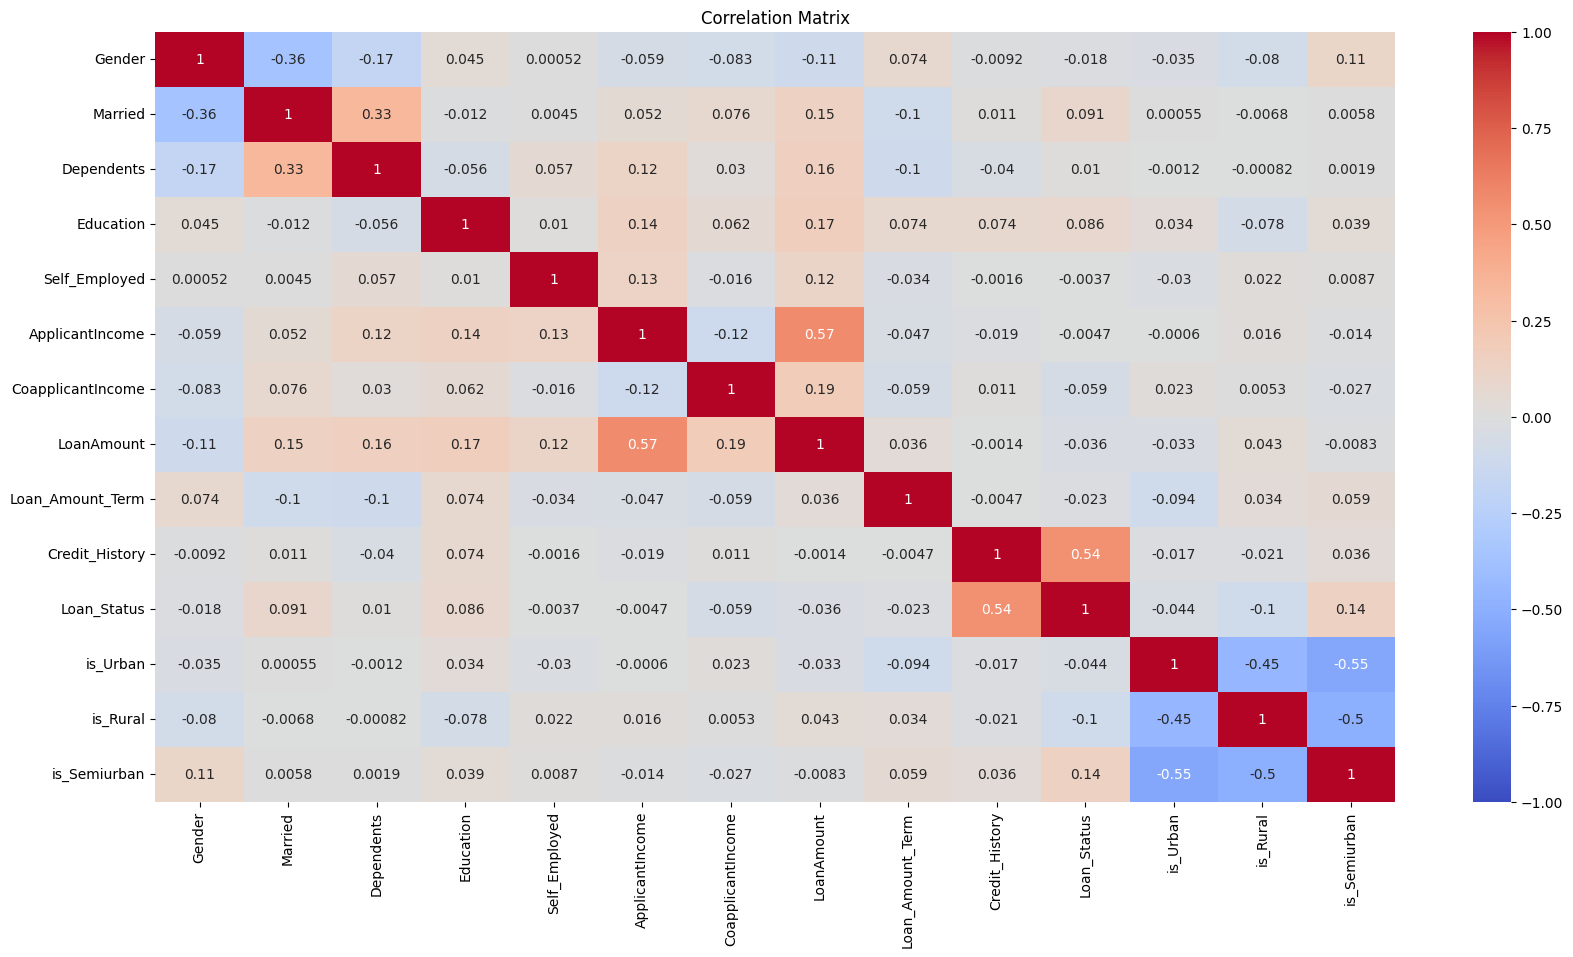

In [49]:
correlation_matrix = train_clean.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [48]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
param_grid = {
    'learning_rate_init': [0.001, 0.01, 0.1],
}

In [50]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=200, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=42,tol=0.000000001,
                     early_stopping = True)

In [51]:
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

print("Best parameters found:", grid_search.best_params_)


Iteration 1, loss = 0.74837942
Validation score: 0.325000
Iteration 2, loss = 0.74530302
Validation score: 0.350000
Iteration 3, loss = 0.74049636
Validation score: 0.375000
Iteration 4, loss = 0.73486495
Validation score: 0.375000
Iteration 5, loss = 0.72825791
Validation score: 0.450000
Iteration 6, loss = 0.72130434
Validation score: 0.525000
Iteration 7, loss = 0.71380153
Validation score: 0.525000
Iteration 8, loss = 0.70663969
Validation score: 0.525000
Iteration 9, loss = 0.69981121
Validation score: 0.550000
Iteration 10, loss = 0.69264569
Validation score: 0.500000
Iteration 11, loss = 0.68606363
Validation score: 0.575000
Iteration 12, loss = 0.67936676
Validation score: 0.600000
Iteration 13, loss = 0.67347767
Validation score: 0.625000
Iteration 14, loss = 0.66802525
Validation score: 0.550000
Iteration 15, loss = 0.66239910
Validation score: 0.650000
Iteration 16, loss = 0.65814462
Validation score: 0.650000
Iteration 17, loss = 0.65301724
Validation score: 0.675000
Iterat

In [52]:
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, Y_train)

Iteration 1, loss = 0.69609853
Validation score: 0.700000
Iteration 2, loss = 0.61809766
Validation score: 0.700000
Iteration 3, loss = 0.55230942
Validation score: 0.880000
Iteration 4, loss = 0.50571522
Validation score: 0.880000
Iteration 5, loss = 0.46542416
Validation score: 0.880000
Iteration 6, loss = 0.43978385
Validation score: 0.880000
Iteration 7, loss = 0.43648977
Validation score: 0.900000
Iteration 8, loss = 0.42709365
Validation score: 0.860000
Iteration 9, loss = 0.41675989
Validation score: 0.900000
Iteration 10, loss = 0.41191010
Validation score: 0.880000
Iteration 11, loss = 0.40352496
Validation score: 0.880000
Iteration 12, loss = 0.39950107
Validation score: 0.880000
Iteration 13, loss = 0.38850131
Validation score: 0.880000
Iteration 14, loss = 0.38115226
Validation score: 0.840000
Iteration 15, loss = 0.37126055
Validation score: 0.860000
Iteration 16, loss = 0.36340556
Validation score: 0.860000
Iteration 17, loss = 0.35826404
Validation score: 0.880000
Iterat

MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 100, 100),
              learning_rate_init=0.1, random_state=42, solver='sgd', tol=1e-09,
              verbose=10)

In [53]:
accuracy = best_clf.score(X_test, Y_test)
accuracy

0.7886178861788617

In [223]:
train_sizes, train_scores, test_scores = learning_curve(
    best_clf, X_train, Y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy', verbose=10
)

[learning_curve] Training set sizes: [ 39  78 117 156 196 235 274 313 352 392]
[CV] START .....................................................................
Iteration 1, loss = 0.70269570
Validation score: 0.750000
Iteration 2, loss = 0.66517887
Validation score: 0.500000
Iteration 3, loss = 0.62066764
Validation score: 0.500000
Iteration 4, loss = 0.57411681
Validation score: 0.500000
Iteration 5, loss = 0.52414876
Validation score: 0.500000
Iteration 6, loss = 0.47150988
Validation score: 0.500000
Iteration 7, loss = 0.41547065
Validation score: 0.250000
Iteration 8, loss = 0.35769670
Validation score: 0.250000
Iteration 9, loss = 0.30378935
Validation score: 0.250000
Iteration 10, loss = 0.25605833
Validation score: 0.250000
Iteration 11, loss = 0.21426071
Validation score: 0.000000
Iteration 12, loss = 0.17804559
Validation score: 0.000000
Validation score did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping.
[CV] END ..................., score=(train=0.667

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s


Iteration 17, loss = 0.40751935
Validation score: 0.833333
Iteration 18, loss = 0.39762345
Validation score: 0.791667
Iteration 19, loss = 0.38845628
Validation score: 0.791667
Iteration 20, loss = 0.36854149
Validation score: 0.791667
Iteration 21, loss = 0.35942262
Validation score: 0.750000
Iteration 22, loss = 0.35027367
Validation score: 0.750000
Validation score did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping.
[CV] END ..................., score=(train=0.821, test=0.838) total time=   0.0s
[CV] START .....................................................................
Iteration 1, loss = 0.68870844
Validation score: 0.678571
Iteration 2, loss = 0.61408406
Validation score: 0.678571
Iteration 3, loss = 0.57713448
Validation score: 0.678571
Iteration 4, loss = 0.53867223
Validation score: 0.750000
Iteration 5, loss = 0.48373927
Validation score: 0.750000
Iteration 6, loss = 0.46353535
Validation score: 0.785714
Iteration 7, loss = 0.45327857
Validation s

[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.2s


Validation score: 0.694444
Iteration 13, loss = 0.38888098
Validation score: 0.694444
Iteration 14, loss = 0.37813188
Validation score: 0.722222
Iteration 15, loss = 0.36773180
Validation score: 0.722222
Validation score did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping.
[CV] END ..................., score=(train=0.793, test=0.818) total time=   0.0s
[CV] START .....................................................................
Iteration 1, loss = 0.68260778
Validation score: 0.700000
Iteration 2, loss = 0.61621451
Validation score: 0.700000
Iteration 3, loss = 0.57572408
Validation score: 0.700000
Iteration 4, loss = 0.53349158
Validation score: 0.775000
Iteration 5, loss = 0.48685041
Validation score: 0.775000
Iteration 6, loss = 0.46339627
Validation score: 0.775000
Iteration 7, loss = 0.45204695
Validation score: 0.750000
Iteration 8, loss = 0.44029590
Validation score: 0.750000
Iteration 9, loss = 0.43259284
Validation score: 0.775000
Iteration 10, loss 

[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed:    0.5s


Iteration 14, loss = 0.30782344
Validation score: 0.916667
Iteration 15, loss = 0.29532766
Validation score: 0.916667
Iteration 16, loss = 0.28257854
Validation score: 0.916667
Iteration 17, loss = 0.27010256
Validation score: 0.916667
Iteration 18, loss = 0.25781968
Validation score: 0.833333
Iteration 19, loss = 0.24553648
Validation score: 0.833333
Iteration 20, loss = 0.23288818
Validation score: 0.833333
Iteration 21, loss = 0.21985291
Validation score: 0.833333
Iteration 22, loss = 0.20695593
Validation score: 0.833333
Validation score did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping.
[CV] END ..................., score=(train=0.880, test=0.806) total time=   0.0s
[CV] START .....................................................................
Iteration 1, loss = 0.69886318
Validation score: 0.750000
Iteration 2, loss = 0.65520753
Validation score: 0.687500
Iteration 3, loss = 0.61376641
Validation score: 0.687500
Iteration 4, loss = 0.57881846
Validatio

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Iteration 2, loss = 0.66845529
Validation score: 0.750000
Iteration 3, loss = 0.62812605
Validation score: 0.750000
Iteration 4, loss = 0.58389278
Validation score: 0.750000
Iteration 5, loss = 0.53809783
Validation score: 0.750000
Iteration 6, loss = 0.49199873
Validation score: 0.750000
Iteration 7, loss = 0.44642304
Validation score: 0.875000
Iteration 8, loss = 0.40362194
Validation score: 0.875000
Iteration 9, loss = 0.36717964
Validation score: 0.875000
Iteration 10, loss = 0.33770663
Validation score: 0.875000
Iteration 11, loss = 0.31441576
Validation score: 0.875000
Iteration 12, loss = 0.29410979
Validation score: 0.875000
Validation score did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping.
[CV] END ..................., score=(train=0.679, test=0.592) total time=   0.0s
[CV] START .....................................................................
Iteration 1, loss = 0.69453203
Validation score: 0.750000
Iteration 2, loss = 0.66288659
Validation scor

[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:    1.1s


Validation score: 0.875000
Iteration 16, loss = 0.45756163
Validation score: 0.875000
Iteration 17, loss = 0.40585717
Validation score: 0.833333
Iteration 18, loss = 0.42172109
Validation score: 0.833333
Iteration 19, loss = 0.40922308
Validation score: 0.833333
Iteration 20, loss = 0.39151435
Validation score: 0.916667
Iteration 21, loss = 0.37895696
Validation score: 0.916667
Validation score did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping.
[CV] END ..................., score=(train=0.826, test=0.755) total time=   0.0s
[CV] START .....................................................................
Iteration 1, loss = 0.68277200
Validation score: 0.678571
Iteration 2, loss = 0.60726682
Validation score: 0.678571
Iteration 3, loss = 0.57433670
Validation score: 0.750000
Iteration 4, loss = 0.52915812
Validation score: 0.750000
Iteration 5, loss = 0.46991097
Validation score: 0.785714
Iteration 6, loss = 0.43806091
Validation score: 0.750000
Iteration 7, los

[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    1.5s


[CV] END ..................., score=(train=0.846, test=0.786) total time=   0.0s
[CV] START .....................................................................
Iteration 1, loss = 0.69072277
Validation score: 0.812500
Iteration 2, loss = 0.65807601
Validation score: 0.687500
Iteration 3, loss = 0.62559969
Validation score: 0.687500
Iteration 4, loss = 0.59632319
Validation score: 0.812500
Iteration 5, loss = 0.56829446
Validation score: 0.812500
Iteration 6, loss = 0.53848828
Validation score: 0.812500
Iteration 7, loss = 0.50713672
Validation score: 0.875000
Iteration 8, loss = 0.47626191
Validation score: 0.875000
Iteration 9, loss = 0.44816414
Validation score: 0.875000
Iteration 10, loss = 0.42404816
Validation score: 0.875000
Iteration 11, loss = 0.40411395
Validation score: 0.937500
Iteration 12, loss = 0.38773601
Validation score: 0.937500
Iteration 13, loss = 0.37405535
Validation score: 0.937500
Iteration 14, loss = 0.36218556
Validation score: 0.937500
Iteration 15, loss = 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    2.0s


Validation score: 0.900000
Iteration 9, loss = 0.45644633
Validation score: 0.900000
Iteration 10, loss = 0.43358531
Validation score: 0.900000
Iteration 11, loss = 0.41543233
Validation score: 0.900000
Iteration 12, loss = 0.40130180
Validation score: 0.950000
Iteration 13, loss = 0.39030851
Validation score: 0.950000
Iteration 14, loss = 0.38161137
Validation score: 0.950000
Iteration 15, loss = 0.37403803
Validation score: 0.900000
Iteration 16, loss = 0.36650588
Validation score: 0.850000
Iteration 17, loss = 0.35867041
Validation score: 0.850000
Iteration 18, loss = 0.35029080
Validation score: 0.900000
Iteration 19, loss = 0.34163612
Validation score: 0.850000
Iteration 20, loss = 0.33272962
Validation score: 0.850000
Iteration 21, loss = 0.32354594
Validation score: 0.850000
Iteration 22, loss = 0.31435101
Validation score: 0.850000
Iteration 23, loss = 0.30506338
Validation score: 0.850000
Validation score did not improve more than tol=0.000000 for 10 consecutive epochs. Stoppi

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.5s


In [224]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

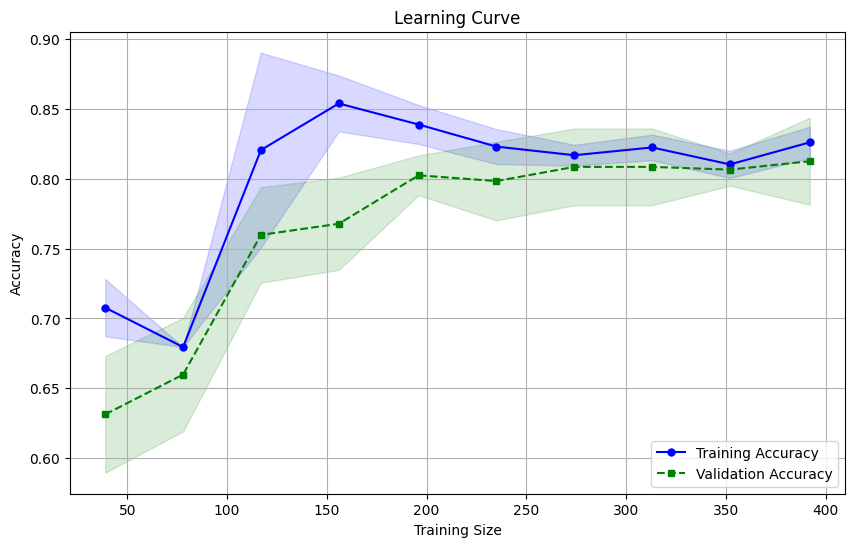

In [225]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [257]:
nb_classifier = GaussianNB()

# Fit the model
nb_classifier.fit(X_train, Y_train)

# Predict on the test set
y_pred = nb_classifier.predict(X_test)

In [258]:
accuracy = accuracy_score(Y_test, y_pred)
print("Naive Bayes Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(Y_test, y_pred))

Naive Bayes Accuracy: 0.7804878048780488
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.42      0.57        43
         1.0       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123

